# Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sns.set(style="white", palette="muted", color_codes=True)

In [4]:
d = np.random.normal(size=1000) ;d[:50]

array([ 0.76431897,  0.33969017, -1.40879885, -1.78925957, -1.88127615,
        0.75678605,  0.97963162, -0.91429545, -1.12419836,  0.48082719,
       -1.11789021,  0.84693288, -0.94972818,  0.51011203,  1.11691923,
       -0.33212123, -0.25545494, -0.3782638 ,  0.69893967, -0.61211734,
        1.00092039,  0.94551704,  2.08379007, -0.33788713, -0.47820041,
       -0.11414644, -0.28195594, -0.24452812, -0.99091495,  0.22081403,
        0.5288606 , -0.30816725,  1.69178448, -0.06469931,  0.26239798,
       -0.56481651, -0.59567633,  0.573122  ,  0.60638693,  1.70883198,
       -0.9290143 ,  0.48107152, -0.5175149 ,  0.75617085,  1.71977727,
        0.24540404, -1.05910051,  0.98957528,  0.02679657,  1.30810881])

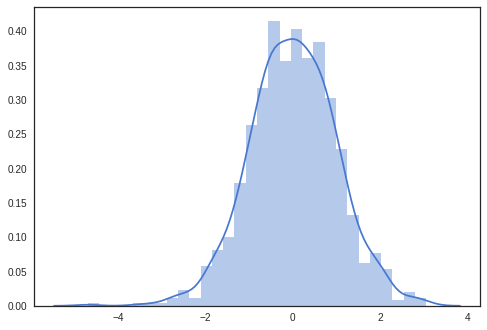

In [5]:
sns.distplot(d)

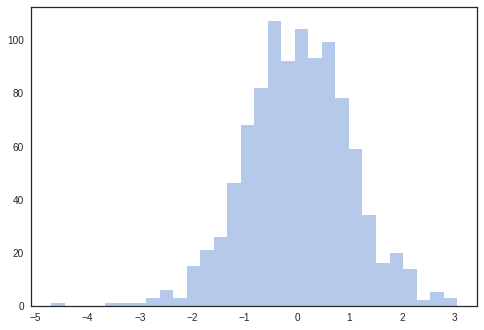

In [6]:
sns.distplot(d, kde=False, color="b")

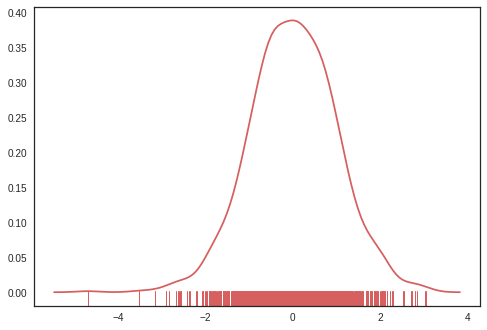

In [7]:
sns.distplot(d, hist=False, rug=True, color="r")

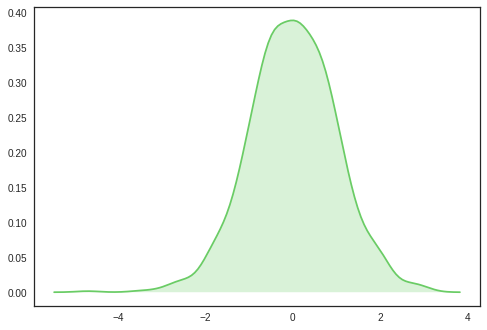

In [8]:
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True})

In [9]:
sns.set(context="paper", font="monospace")

In [10]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
df.head()

network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5               ...             16  \
node             1                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0        47.461037  26.746613 -35.898861  -1.889181    ...       0.607904   
1        -1.210660 -19.012897  19.568010  15.902983    ...      57.495071   
2       -65.575806 -85.777428  19.247454  37.209419    ...      28.317369   
3       -41.800869 -58.610184  32.896915  11.199619    ...      71.439629   
4       -62.613335 -49.076508  18.396759   3.219077    ...      95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

In [11]:
corrmat = df.corr()

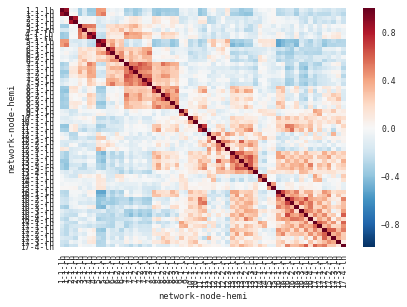

In [12]:
sns.heatmap(corrmat)

In [13]:
# Create a custom palette to identify the networks
unique_networks = np.unique(df.columns.get_level_values('network'))
network_pal = sns.cubehelix_palette(len(unique_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_pal

[[0.14250609166695374, 0.06696404307500585, 0.14344253747283972],
 [0.16155595934115108, 0.12444369703732092, 0.2466464947085397],
 [0.14490368795926326, 0.2065088491953011, 0.31535170401288914],
 [0.1285992257028432, 0.29967426422747695, 0.32357022202263963],
 [0.15032152486952025, 0.3756120303785364, 0.28483176769910223],
 [0.23620049823315173, 0.42844599401601735, 0.23069205631078665],
 [0.378371563830964, 0.44553789451608256, 0.21473665337039155],
 [0.5381478534618528, 0.4397533771843333, 0.2734683932550487],
 [0.6656111186385743, 0.43635006390944575, 0.40755477466353185],
 [0.7234718558513549, 0.45695406637490565, 0.5670486304505923],
 [0.717640012906113, 0.5165548651039193, 0.726734835696926],
 [0.6694671741276111, 0.60879824611575, 0.8268127869297095],
 [0.6267068736639345, 0.7124215003888157, 0.8510913809212952],
 [0.6305167236407697, 0.8023909287392934, 0.8215947703283651],
 [0.6875219312333126, 0.8596527799610639, 0.7868013832755658],
 [0.7896401936423323, 0.8948250122495803,

In [14]:
network_lut = dict(zip(map(str, unique_networks), network_pal))
network_lut

{'1': [0.14250609166695374, 0.06696404307500585, 0.14344253747283972],
 '10': [0.16155595934115108, 0.12444369703732092, 0.2466464947085397],
 '11': [0.14490368795926326, 0.2065088491953011, 0.31535170401288914],
 '12': [0.1285992257028432, 0.29967426422747695, 0.32357022202263963],
 '13': [0.15032152486952025, 0.3756120303785364, 0.28483176769910223],
 '14': [0.23620049823315173, 0.42844599401601735, 0.23069205631078665],
 '15': [0.378371563830964, 0.44553789451608256, 0.21473665337039155],
 '16': [0.5381478534618528, 0.4397533771843333, 0.2734683932550487],
 '17': [0.6656111186385743, 0.43635006390944575, 0.40755477466353185],
 '2': [0.7234718558513549, 0.45695406637490565, 0.5670486304505923],
 '3': [0.717640012906113, 0.5165548651039193, 0.726734835696926],
 '4': [0.6694671741276111, 0.60879824611575, 0.8268127869297095],
 '5': [0.6267068736639345, 0.7124215003888157, 0.8510913809212952],
 '6': [0.6305167236407697, 0.8023909287392934, 0.8215947703283651],
 '7': [0.6875219312333126,

In [15]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)
network_colors

network  node  hemi
1        1     lh      [0.14250609166695374, 0.06696404307500585, 0.1...
               rh      [0.14250609166695374, 0.06696404307500585, 0.1...
2        1     lh      [0.7234718558513549, 0.45695406637490565, 0.56...
               rh      [0.7234718558513549, 0.45695406637490565, 0.56...
3        1     lh      [0.717640012906113, 0.5165548651039193, 0.7267...
               rh      [0.717640012906113, 0.5165548651039193, 0.7267...
4        1     lh      [0.6694671741276111, 0.60879824611575, 0.82681...
               rh      [0.6694671741276111, 0.60879824611575, 0.82681...
5        1     lh      [0.6267068736639345, 0.7124215003888157, 0.851...
               rh      [0.6267068736639345, 0.7124215003888157, 0.851...
6        1     lh      [0.6305167236407697, 0.8023909287392934, 0.821...
               rh      [0.6305167236407697, 0.8023909287392934, 0.821...
         2     lh      [0.6305167236407697, 0.8023909287392934, 0.821...
               rh      [0.63051

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


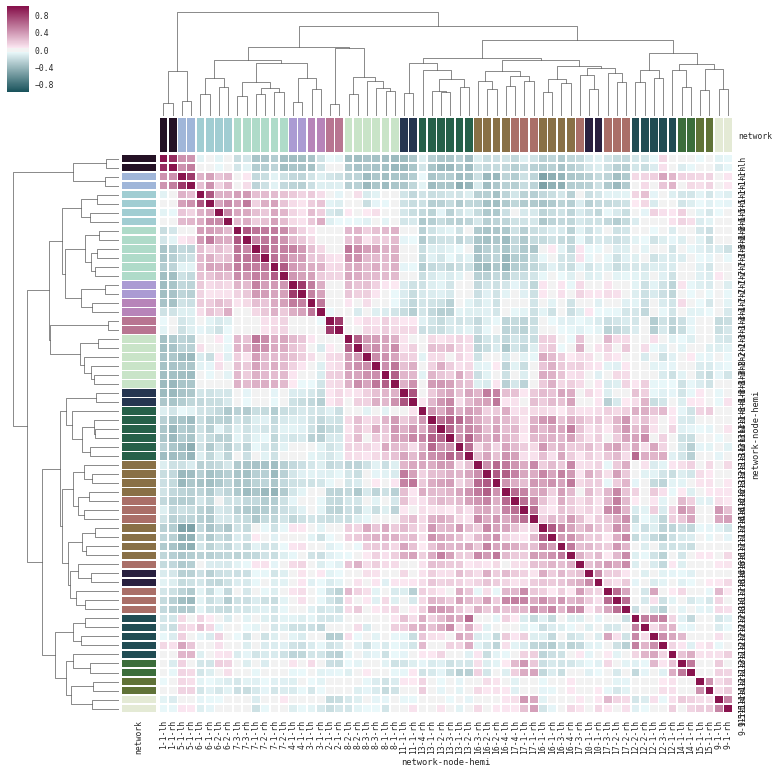

In [16]:

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)